# Fundamentals module Project

Solutions for the project assessment for Fundamentals of Data Analysis. Author is Noel Manley (G00387903@hotmail.com).

## Instructions

In this project you must perform and explain simple linear regression using Python on the powerproduction dataset available on Moodle. The goal is to accurately predict wind turbine power output from wind speed values using the data set as a basis. 
To enhance your submission, you might consider comparing simple linear regression toother types of regression on this data set.

## Solution
***

### Introduction

Harvesting wind energy has been a concern for man for many centuries. It is has become increasingly important over the last number of decades as a source of energy due to the declining stocks of fossil fuels. It is also a more environmentally friendly source of energy as it does not significantly damage our environment when compared with fossil fuels [1]. It is predicted that wind and solar capacity will double over the next five years globally and exceed that of both gas and coal [2].

Wind turbines have to compete with other sources of energy. Characteristics such as wind turbine power versus wind speed must be optimized to be cost effective in order to compete with these other sources of energy and provide investors with a return on their investment. The data in the powerproduction dataset gives an indication of the what wind speed is required to get maximum power from a wind turbine

#### Import powerproduction dataset

In [2]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

# import dataset from githib repository
df = pd.read_csv("powerproduction.txt")
# show first 10 records of the dataset
df.head(10)

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


### Analysis of the powerproduction dataset

The powerproduction dataset contains 2 variables (speed & power). The plot of the dataset below shows the relationship between the wind speed and power outage variables is similar to an S-shape curve [3]. At a low wind speed (below 8mph) there is very little power production from the turbine. From a wind speed of 10 mph power production increases substantially from approximatially 20 watts at 10mph to 80 watts at 15mph brfore levelling off at a wind speed of 20mph which produces 100 watts of energy. The power production then goes down slightly and abruptly goes back to zero at a wind speed of 24mph which i would interpret as a cut-off point of the wind turbine.

There are a few outliers in the dataset where there are four wind speed points in the data which produce zero output as well as the zero output above 24mph. Becaus of this the dataset doesn't fit a straight line linear regression that well and may be more appropriate for a curved line regression.

#### Plotting the dataset

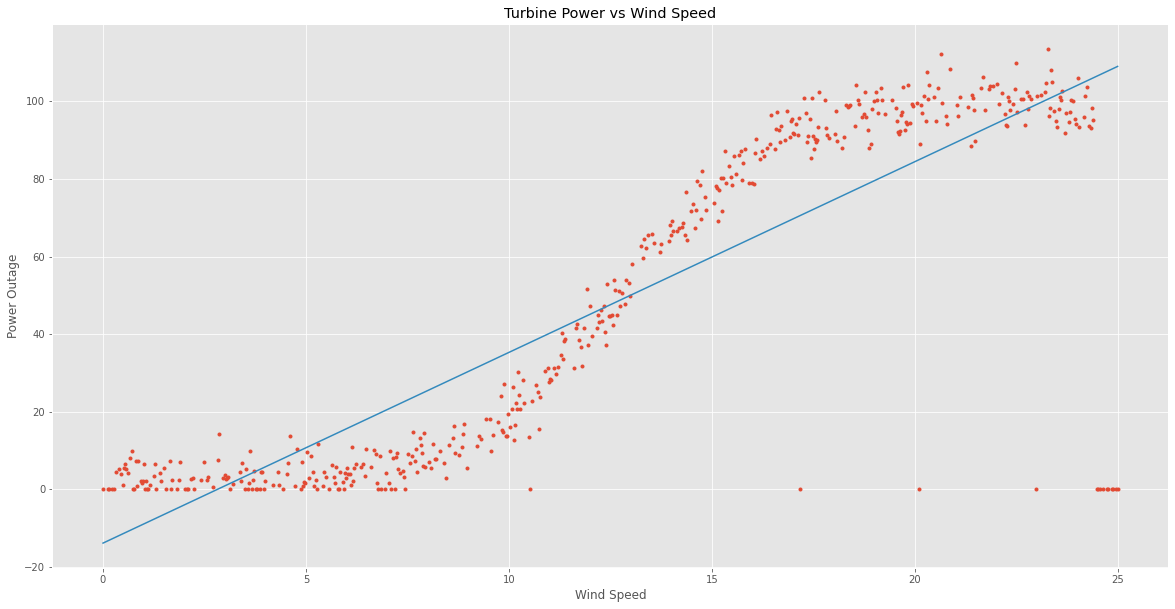

In [54]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# make plot tidier
plt.style.use("ggplot")
# make plot bigger
plt.rcParams["figure.figsize"] = (20,10)

# set x equal to speed variable and y to power variable
x = df.speed
y = df.power


coeffs = np.polyfit(x,y,1)
plt.plot(x, y, '.', label = "Data")
c=plt.plot(x, coeffs[0]*x+coeffs[1], '-', label = "Best fit")
#plt.plot(df["speed"], df["power"], '.', label = "Data")

# add title, xlabel and ylabel to plot
plt.title("Turbine Power vs Wind Speed")
plt.xlabel("Wind Speed")
plt.ylabel("Power Outage");

In [52]:
coeffs

array([  4.91759567, -13.89990263])

### References

[1]-Renewables-info.com: Is wind energy environmentally friendly source of energy?; http://www.renewables-info.com/energy_news_and_reports/is_wind_energy_environmentally_friendly_source_of_energy.html?jjj=1609686518280

[2]-Resilience: IEA: Wind and solar capacity will overtake both gas and coal globally by 2024; https://www.resilience.org/stories/2020-11-12/iea-wind-and-solar-capacity-will-overtake-both-gas-and-coal-globally-by-2024/

[1]-windpower.generatorguide: Wind Power Calculator; http://windpower.generatorguide.net/wind-speed-power.html

